This notebook attempts to detect straggler of MD analysis by plotting RMSD across multiple resources using up to 768 cores. The test script is written by mpi4py and the data file is parsed to represent a histogram of execution time each frame. Data file contains [total size]\s[argument]\s[mean value of each execution time]\s[total execution time] where I pick up the last column to display.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

This test run was completed with the following resources using up to 768 cores.

In [27]:
entry = { "bridges": [ 28, 224, 448],
        "comet": [24, 96, 192],
        "wrangler": [48, 96, 192, 384, 768] }

In [70]:
df = {}
for resource_name, core_list in entry.items():
    for num_cores in core_list:
        df_tmp = pd.read_csv(open("straggler/{}.{}.data.txt".format(resource_name, num_cores)), sep=" ", header=None)
        df[resource_name + "." + str(num_cores)] = df_tmp[4]

In [72]:
df = pd.DataFrame.from_dict(df)

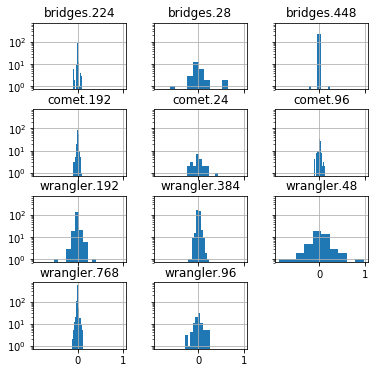

In [75]:
plt.figure()
#df.diff().plot.kde( figsize=(6,6), sharex=True, sharey=True)
df.diff().hist(log=True, figsize=(6,6), sharex=True, sharey=True)
plt.show()